# Install the required Libraries

In [2]:
!pip install tensorflow --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 90.0 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.0
    Uninstalling tensorflow-2.17.0:
      Successfully uninstalled tensorflow-2.17.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompat

# ***Import required libraris***

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

# ***Read the data***

In [3]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# ***Perform the train test Split***

In [20]:
# 75% of the data is selected
# DIY - Tak -1 Peform this using train test split function
train_df = df.sample(frac=0.75, random_state=4)

# it drops the training data from the original dataframe
val_df = df.drop(train_df.index)

# ***Featuring Scaling***

In [19]:
# calling to (0,1) range -
# Q1. Perform this using the min-max scals/ Standard scaler.
# Q2. what are the difference between them?

max_val = train_df.max(axis= 0)
min_val = train_df.min(axis= 0)

range = max_val - min_val
train_df = (train_df - min_val)/(range)

val_df = (val_df- min_val)/range


In [8]:
print(max_val)
print(min_val)
print(range)
print(train_df)
print(val_df)

fixed acidity            11.30000
volatile acidity          1.46000
citric acid               0.79000
residual sugar           14.50000
chlorides                 0.59900
free sulfur dioxide      71.00000
total sulfur dioxide    283.00000
density                   0.01362
pH                        1.15000
sulphates                 1.65000
alcohol                   6.50000
quality                   5.00000
dtype: float64


# ***Separate the targets and labels***

In [9]:
X_train = train_df.drop('quality',axis=1)
X_val = val_df.drop('quality',axis=1)
y_train = train_df['quality']
y_val = val_df['quality']

# We'll need to pass the shape of features/inputs as an argument in our model, so let's define a variable to save it.
input_shape = [X_train.shape[1]]

print(input_shape)

[11]


# ***Define Your model***

In [10]:
model = tf.keras.Sequential([
tf.keras.layers.Dense(units=1,input_shape=input_shape)])

# after you create your model it's always a good habit to print out it's summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12 (48.00 B)

 Trainable params: 12 (48.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Play around this value to understand the params and share observations
model = tf.keras.Sequential([

	tf.keras.layers.Dense(units=64, activation='relu',
						input_shape=input_shape),
	tf.keras.layers.Dense(units=64, activation='relu'),
	tf.keras.layers.Dense(units=1)
])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,993 (19.50 KB)

 Trainable params: 4,993 (19.50 KB)

 Non-trainable params: 0 (0.00 B)

# Number of parameters=(input units × output units) + output units
### Layer - 1 = (11 × 64) + 64 = 704 + 64 = 768
### Layer - 2 = (64 × 64) + 64 = 4096 + 64 = 4160
### Layer - 3 = (64 × 1) + 1 = 64 + 1 = 65

In [12]:
# adam optimizer works pretty well for all kinds of problems and is a good starting point
model.compile(optimizer='adam',

			# MAE error is good for numerical predictions
			loss='mae')

# ***Train your model***

In [13]:
losses = model.fit(X_train, y_train,

				validation_data=(X_val, y_val),

				# it will use 'batch_size' number of examples per example
				batch_size=256,
				epochs=15, # total epoch

				)

Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.5540 - val_loss: 0.4240
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3864 - val_loss: 0.2512
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2128 - val_loss: 0.1356
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1348 - val_loss: 0.1474
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1559 - val_loss: 0.1497
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1486 - val_loss: 0.1295
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1292 - val_loss: 0.1229
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1243 - val_loss: 0.1223
Epoch 9/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1212 - val_loss: 0.1144
Epoch 10/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1165 - val_loss: 0.1082
Epoch 11/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1099 - val_loss: 0.1068
Epoch 12/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1056 - val_loss: 0.1044
Ep

# ***Test your model***

In [16]:
# this will pass the first 3 rows of features of our data as input to make predictions
model.predict(X_val.iloc[0:3, :])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


array([[0.4133401 ],
       [0.50533843],
       [0.4491623 ]], dtype=float32)

In [17]:
y_val.iloc[0:3]

,quality
0,0.4
9,0.4
12,0.4


# ***Plot the loss***

<Axes: >

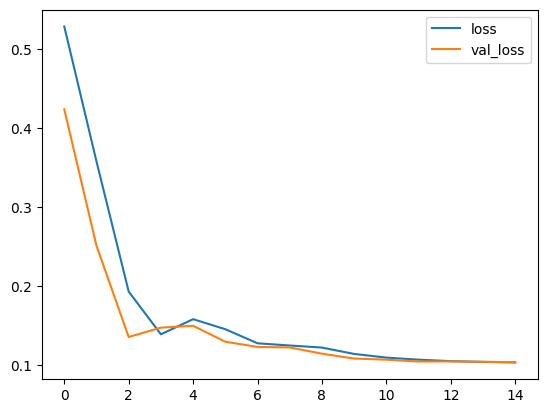

In [18]:
loss_df = pd.DataFrame(losses.history)

# history stores the loss/val
# loss in each epoch

# loss_df is a dataframe which
# contains the losses so we can
# plot it to visualize our model training
loss_df.loc[:,['loss','val_loss']].plot()